##  Anechoic auralization

Based on the principles that we've just seen in the lecture, we are going to simulate an anechoic stereophonic recording of a speech signal. 

#### 1 Preliminaries

After importing some packages, we first load a monophonic (i.e. single-microphone) speech signal, listen to it and plot its waveform and power spectrogram

In [ ]:
import matplotlib
import IPython.display as ipd
import numpy as np
import soundfile as sf 
import matplotlib.pyplot as plt
import scipy as sp
import librosa
import librosa.display
import os
from utils import plot_recording_config, anechoic_FD_auralization

In [ ]:
# load wav file

data_path = './data'

s, fs = librosa.load(os.path.join(data_path,'voice_man_1.wav'), sr=None)
T = s.shape[0]

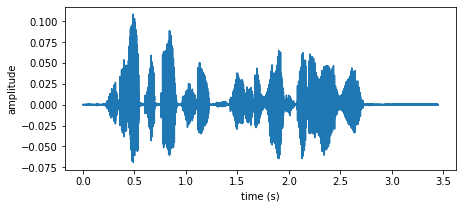

In [ ]:
# plot waveform and listen

time_vec = np.arange(T)/fs

plt.figure(figsize=(7,3))
plt.plot(time_vec, s)
plt.xlabel('time (s)')
plt.ylabel('amplitude')

ipd.display(ipd.Audio(s, rate=fs))

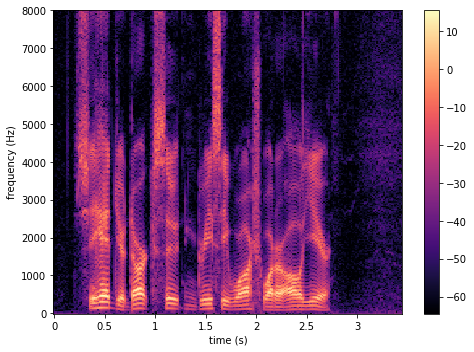

In [ ]:
# compute the STFT and plot the power spectrogram

wlen_sec = 32e-3 # STFT window length in seconds
hop_percent = .5 # hop size as a percent of the window length
wlen = int(wlen_sec*fs) # window length in samples
wlen = int(np.power(2, np.ceil(np.log2(wlen)))) # next power of 2
F = wlen//2+1 # number of non-redundant frequency bins
hop = int(hop_percent*wlen) # hop size in samples
win = np.sin(np.arange(.5,wlen-.5+1)/wlen*np.pi); # sine analysis window

S = librosa.stft(s, n_fft=wlen, hop_length=hop, win_length=wlen, window=win) # STFT of the source signal

plt.figure(figsize=(7,5))
librosa.display.specshow(librosa.power_to_db(np.abs(S)**2), sr=fs, hop_length=hop, x_axis='time', y_axis='hz')

plt.colorbar()

plt.ylabel('frequency (Hz)')
plt.xlabel('time (s)')
plt.tight_layout()

#### 2 Recording configuration

We define the recording configuration, i.e. the source and microphone cartesian coordinates (in the horizontal plan).

Distance from the source to the center of the microphone array 0.50 m


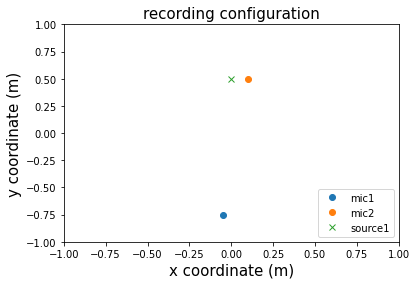

In [ ]:
q_m1 = np.array([-5e-2, -0.75]) # 1st microphone cartesian coordinates
q_m2 = np.array([0.1, 0.5]) # 2nd microphone cartesian coordinates
q_s = np.array([0, 0.5]) # source cartesian coordinates

plot_recording_config(q_m1, q_m2, q_s)

print("Distance from the source to the center of the microphone array %.2f m" % np.linalg.norm(np.array([0, 0]) - q_s))

#### 3 Spatial cues computation

In the next cell, you have to compute:

- the euclidean distance between the source and the two microphones (you can use `np.linalg.norm`):

$$d_i = || \mathbf{q}_{m_i} - \mathbf{q}_s ||_2, \qquad i \in \{1,2\}. $$

- the inter-microphone level ratio, also called inter-channel level difference (ILD):

$$a = d_1/ d_2.$$

- the time difference of arrival (TDoA) in seconds, also called inter-channel time difference (ITD):

$$\displaystyle \delta = \frac{d_2 - d_1}{c}, $$

where $c = 344$ (m/s) is the sound velocity. The TDoA will then be converted to samples by multiplying with the sampling rate `fs`.

**ILD and ITD are two important spatial cues for localizing sound sources**.

In [ ]:
d1 = np.linalg.norm(q_m1 - q_s) # source-to-1st microphone distance
d2 = np.linalg.norm(q_m2 - q_s) # source-to-2nd microphone distance

c = 344 # sound velocity in m/s

a = d1/d2 # inter-microphone level ratio
delta_sec = (d1-d2)/c # time difference of arrival in seconds
delta = delta_sec*fs

#### 4 Auralization

In the next cell, we call the `anechoic_FD_auralization` function which will create an auralized stereophonic signal `x` from the source signal `s`, the inter-microphone level ratio (ILD) `d` and the time difference of arrival (ITD) `delta` computed in the previous cell.



In [ ]:
x = anechoic_FD_auralization(s, a, delta)

print(s.shape)
print(x.shape)

(55194,)
(55194, 2)


In the next cell, compare (by listening) the original monophonic signal and the resulting stereophonic signal **using head/earphones**. What do you notice?

In [ ]:
print('original monophonic signal')
ipd.display(ipd.Audio(s, rate=fs))
print('auralized stereophonic signal')
ipd.display(ipd.Audio([x[:,0], x[:,1]], rate=fs))

original monophonic signal


auralized stereophonic signal


Change the source position and verify that it sounds as expected.